<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


<h2>Task 2: Generate Descriptive Statistics and Visualizations</h2>

1. For the "Median value of owner-occupied homes" provide a boxplot

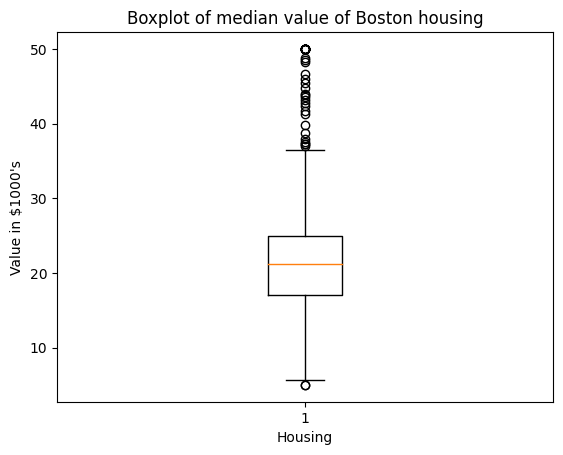

In [46]:
pyplot.boxplot(boston_df['MEDV'])
pyplot.title('Boxplot of median value of Boston housing')
pyplot.ylabel('Value in $1000\'s')
pyplot.xlabel('Housing')
pyplot.show()

The 2 lower and 2 upper quartiles are quite well balanced. The average price is just above 20000 but ranges from about 4000 to about 36000. There are quite a few outliers above the the upper quartile.

2. Provide a  bar plot for the Charles river variable

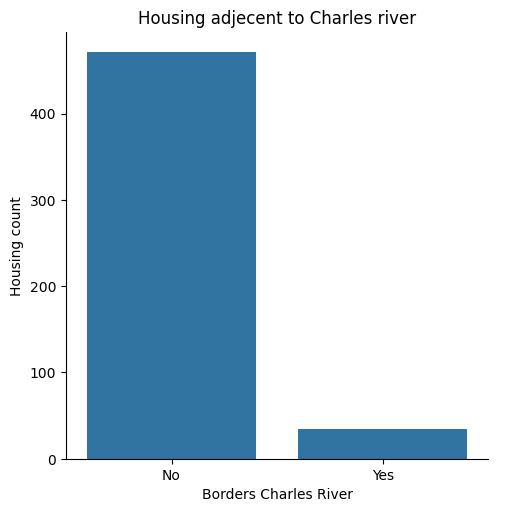

In [47]:
sns.catplot(x = boston_df['CHAS'], kind = 'count')
pyplot.xticks([0,1],['No','Yes'])
pyplot.xlabel('Borders Charles River')
pyplot.ylabel('Housing count') 
pyplot.title('Housing adjecent to Charles river')

pyplot.show()

The large majority of housing is not adjencent to the Charles river. 

3.Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

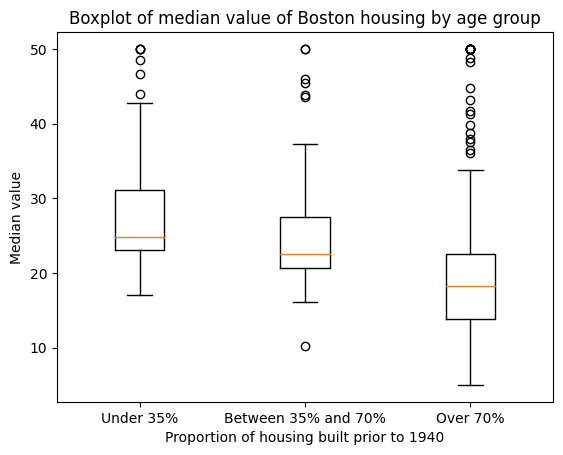

In [48]:
young = boston_df[boston_df['AGE'] < 35]
middle = boston_df[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70)]
old = boston_df[(boston_df['AGE'] > 70)]

datasets = [young['MEDV'],middle['MEDV'],old['MEDV']]

pyplot.boxplot(datasets)
pyplot.xticks([1,2,3], ['Under 35%','Between 35% and 70%', 'Over 70%'])
pyplot.ylabel('Median value')
pyplot.xlabel('Proportion of housing built prior to 1940')
pyplot.title('Boxplot of median value of Boston housing by age group')
pyplot.show()

It seems that the areas that have a larger proportion of housing built after 1940 have a greater median value.

4. Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

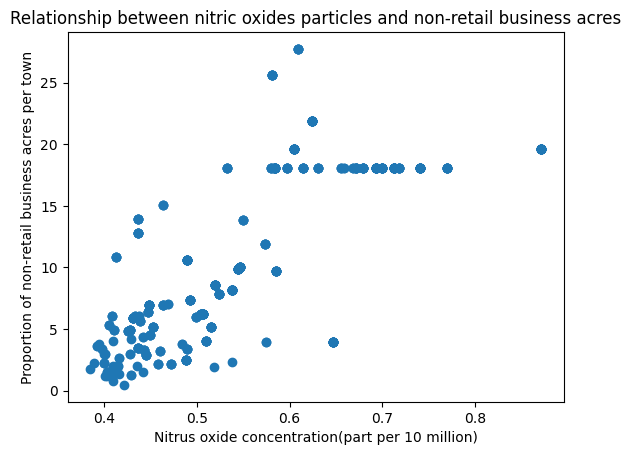

In [49]:
pyplot.scatter(boston_df['NOX'], boston_df['INDUS'])
pyplot.xlabel('Nitrus oxide concentration(part per 10 million)')
pyplot.ylabel('Proportion of non-retail business acres per town')
pyplot.title('Relationship between nitric oxides particles and non-retail business acres')
pyplot.show()

The relationship between non-retail business and the concentration of nitrus oxide is positive. 

5. Create a histogram for the pupil to teacher ratio variable

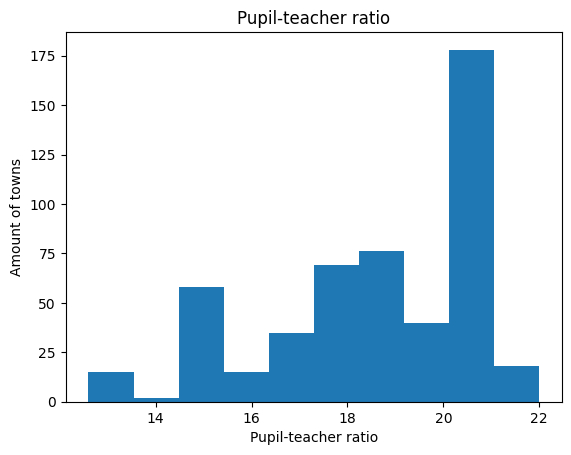

In [27]:
pyplot.hist(boston_df['PTRATIO'])
pyplot.title('Pupil-teacher ratio')
pyplot.ylabel('Amount of towns')
pyplot.xlabel('Pupil-teacher ratio')
pyplot.show()

The most common pupil-teacher ratio is 21. However the largest part of the distribution is between 15 to 21 pupils per teacher.

<h2>Task 3: Use the appropriate tests to answer the questions provided.</h2>

1. Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [40]:
groupone = boston_df[boston_df['CHAS'] == 1]['MEDV']
groupzero = boston_df[boston_df['CHAS'] == 0]['MEDV']

tstatistic, pvalue = scipy.stats.ttest_ind(groupone, groupzero, equal_var = False)

print('(H0): There is no significant difference in the median value of housing between housing that is adjacent to the Charles river and that which is not.')
print('(H1): There is a significant difference in the median value of housing between housing that is adjacent to the Charles river and that which is not.')

print("t-statistic:", tstatistic)
print("p-value:", pvalue)

(H0): There is no significant difference in the median value of housing between housing that is adjacent to the Charles river and that which is not.
(H1): There is a significant difference in the median value of housing between housing that is adjacent to the Charles river and that which is not.
t-statistic: 3.113291312794837
p-value: 0.003567170098137517


The relationship between the median value of housing adjacent to the Charles river and those that are not is very significant. Alternative hypothesis (H1) is confirmed. 

2. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [44]:
young = boston_df[boston_df['AGE'] < 35]['MEDV']
middle = boston_df[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70)]['MEDV']
old = boston_df[(boston_df['AGE'] > 70)]['MEDV']

fstatistic, pvalue = scipy.stats.f_oneway(young,middle,old)

print('(H0): There is no significant difference in median value of housing based on the proportion of homes built before 1940')
print('(H1): There is a significant difference in median value of housing based on the proportion of homes built before 1940')

print('fstatistic', fstatistic)
print('pvalue' , pvalue)

(H0): There is no significant difference in median value of housing based on the proportion of homes built before 1940
(H1): There is a significant difference in median value of housing based on the proportion of homes built before 1940
fstatistic 36.40764999196599
pvalue 1.7105011022702984e-15


There is a strong statistical difference between median values of housing based on how great a proportion of the housing was built prior to 1940. The alternative hypothesis (H1) is confirmed.

3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [45]:
corr, pvalue = scipy.stats.pearsonr(boston_df['NOX'],boston_df['INDUS'])

print('(H0): There is no significant relationship between the nitric oxide concentrations and the proportion of non-retail business acres per town.')
print('(H1): There is a significant relationship between the nitric oxide concentrations and the proportion of non-retail business acres per town.')
      
print('correlation', corr)
print('pvalue' , pvalue)  

(H0): There is no significant relationship between the nitric oxide concentrations and the proportion of non-retail business acres per town.
(H1): There is a significant relationship between the nitric oxide concentrations and the proportion of non-retail business acres per town.
correlation 0.7636514469209192
pvalue 7.913361061210442e-98


No, there is a clear and significant relationship. We can expect greater levels of nitric oxide in towns with a higher proportion of non-retail business acres. The alternative hypothesis (H1) is confirmed.

4. What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [78]:
scipy.stats.linregress(boston_df['DIS'], boston_df['MEDV'])

LinregressResult(slope=1.0916130158411097, intercept=18.390088330493384, rvalue=0.2499287340859039, pvalue=1.2066117273371223e-08, stderr=0.18837841478683107, intercept_stderr=0.8173887085024754)

The impact is 1.0916130158411097. This means that for each 1 increase in the "weighted distance to five Boston employment centres" there will generally be an increase of 1.0916130158411097 in the median value of the housing.